# Scanner level identification result aggregation 
**to run this code, define dataset_name='SelfDeploy24' or 'SelfDeploy25'.**

In [1]:
dataset_name='SelfDeploy25'

**load configurations**

In [2]:
import pickle
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import numpy as np

proto_list=['http','tls','dns']
work_dir='IOMatch-main_per_service_total_sample_incre'
time_window_list= [7]

if(dataset_name=='SelfDeploy24'):
    name='merge_month_2_4'
    ensemble_dir='train_ensemble_batch32_epoch2'

if(dataset_name=='SelfDeploy25'):
    name='selfdeploy_24_25_1week'
    ensemble_dir='train_ensemble_batch32_epoch2_selfdeploy25'

interval 7
[('2024-12-10', '2024-12-17'), ('2024-12-17', '2024-12-24'), ('2024-12-24', '2024-12-31'), ('2024-12-31', '2025-01-07'), ('2025-01-07', '2025-01-14'), ('2025-01-14', '2025-01-21'), ('2025-01-21', '2025-01-28'), ('2025-01-28', '2025-02-04'), ('2025-02-04', '2025-02-11'), ('2025-02-11', '2025-02-18'), ('2025-02-18', '2025-02-25'), ('2025-02-25', '2025-03-04'), ('2025-03-04', '2025-03-11')]


/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.42
test                  precision    recall  f1-score   support

     binaryedge       1.00      0.65      0.79        92
     criminalip       1.00      0.82      0.90        11
     cybergreen       1.00      1.00      1.00         1
           fofa       0.00      0.00      0.00         3
internet_census       1.00      0.96      0.98        72
     internettl       0.54      1.00      0.70         7
      intrinsec       1.00      1.00      1.00         2
           ipip       0.00      0.00      0.00         6
         onyphe       0.68      0.81      0.74        26
          quake       0.00      0.00      0.00         2
         rapid7       0.00      0.00      0.00         5
   shadowserver       0.92      0.51      0.66       118
         shodan       1.00      1.00      1.00        10
     stretchoid       0.91      0.98      0.95       400
            tum       0.00      0.00      0.00         1
censys+driftnet       0.77      0.96      0.85       265

       accuracy    

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


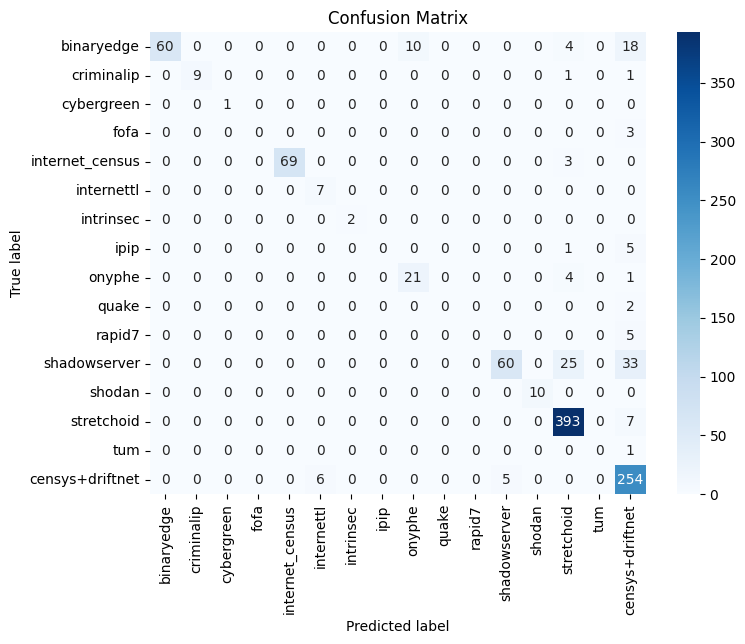

In [3]:
#ensemble learning
import pickle
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
import numpy as np


use_train_threshold=1
train_interval=time_window_list[0]

datasets=[]
labels=[]

print('interval',train_interval)
if(dataset_name=='SelfDeploy24'):
    mode = 'incre'
    start_date = '2024-02-01'    
    end_date = '2024-04-21'      
else:
    mode = ''
    start_date = '2024-12-10'    
    end_date = '2025-03-10'     


from datetime import datetime, timedelta

def generate_date_range(start_date_str, end_date_str):
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
    date_list = []
    current_date = start_date
    
    while current_date <= end_date:
        # Calculate the end date of the next week
        next_date = min(current_date + timedelta(days=7), end_date + timedelta(days=1))
        date_list.append((current_date.strftime('%Y-%m-%d'),next_date.strftime('%Y-%m-%d')))
        current_date = next_date
    return date_list
    

date_ranges = generate_date_range(start_date, end_date)

print(date_ranges)
for current_date_index in range(len(date_ranges)):
    start_date_str,end_date_str=date_ranges[current_date_index]
    for item in proto_list:
        with open( work_dir+'/'+'proto_level_'+str(train_interval)+'daysegment_pred_'+item+'_'+name+'_'+mode+'_'+start_date_str+'.pkl', 'rb') as file:
            data = pickle.load(file)
            #print('data',data)
        if (item == 'http'):
            df_ip_http_group = data
        if (item == 'tls'):
            df_ip_tls_group = data
        if (item == 'dns'):
            df_ip_dns_group = data
        if(item=='rdp'):
            df_ip_rdp_group=data
        if(item=='ssh'):
            df_ip_ssh_group=data
        if(item=='smb'):
            df_ip_smb_group=data

    
    import os
    
    
    folder_path = work_dir+'/'+ensemble_dir+'/result_'+str(train_interval)+'day_segment_http'+'_'+start_date_str
        
    # Get all files starting with 'seg' in the folder
    files = [f for f in os.listdir(folder_path) if f.startswith('seg') and f.endswith('.csv')]
    train_X_list = []
    train_y_list = []
    for file in files:
        if ('http' in proto_list):
            df_ip_http_train = df_ip_http_group[file]
        if ('tls' in proto_list):
            df_ip_tls_train = df_ip_tls_group[file]
        if ('dns' in proto_list):
            df_ip_dns_train = df_ip_dns_group[file]
        if ('ssh' in proto_list):
            df_ip_ssh_train=df_ip_ssh_group[file]
        if ('rdp' in proto_list):
            df_ip_rdp_train=df_ip_rdp_group[file]
        if ('smb' in proto_list):
            df_ip_smb_train=df_ip_smb_group[file]
    
        # Initialize an empty DataFrame for the merge
        merged_df = pd.DataFrame()
        
        # Iterate through the list of variables and merge the corresponding DataFrame
        for var in proto_list:
            # Use globals() to get the corresponding DataFrame based on a string.
            df_to_merge = globals()[f'df_ip_{var}_train']
            # Merging DataFrames using an outer join
            if merged_df.empty:
                merged_df = df_to_merge
            else:
                merged_df = pd.merge(merged_df, df_to_merge, how='outer')
            
        df_train_ip_merge=merged_df
        #print(df_train_ip_merge)
    
        train_X=df_train_ip_merge[['pred_label_' + var for var in proto_list]]

        train_y = np.array(df_train_ip_merge[['label']])
        train_X_list.append(train_X)
        train_y_list.append(train_y)
        # train_X=train_X.fillna(None)
    # print(train_X_list,train_y_list)
    train_X_all = train_X_list[0]
    train_y_all = train_y_list[0]
    #train_X_all = pd.concat(train_X_list, ignore_index=True)
    #train_y_all = np.concatenate(train_y_list, axis=0)
    train_X_all_cp=train_X_all.copy()
    train_y_all_cp=train_y_all.copy()
    
    #print(train_X_all)
    #print(train_y_all)
    
    mask = train_y_all < 25
    train_y_all = train_y_all[mask]
    train_X_all = train_X_all[mask]
    
    #print(train_X)
    
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder
    from sklearn.linear_model import LogisticRegression
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    label_list = ['adscore',
                  'ahrefs',
                  'arbor',
                  'archive',
                  'binaryedge',
    
                  'criminalip',
                  'cybergreen',
    
                  'fofa',
                  'internet_census',
                  'internettl',
                  'intrinsec',
                  'ipip',
                  'leakix',
                  'onyphe',
                  'quadmetrics',
                  'quake',
                  'rapid7',
                  'rau',
                  'shadowserver',
                  'shodan',
                  'stretchoid',
                  'tum',
                  'webRay',
                  'x_threatbook',
                  'zoomeye',
                  'driftnet(added in unknown)',
                  'unknown',
                  'censys(added in unknown)'
                  ]
    
    #
    #
    # train_X=train_X.fillna("None")
    # le = LabelEncoder()
    # encoder = le.fit(label_list)
    
    # train_X.iloc[:,0] = encoder.transform(train_X.iloc[:,0])
    # train_X.iloc[:,1] = encoder.transform(train_X.iloc[:,1])
    # train_X.iloc[:,2] = encoder.transform(train_X.iloc[:,2])
    num_classes = 25
    open_mask = train_y_all >= num_classes
    train_y_all[open_mask] = num_classes
    
    
    #Delete the 26unknown class and convert the 25 and 27 label to 25
    value_to_delete = 26
    
    ans_train_y_all_cp = [item for list in train_y_all_cp.tolist() for item in list]
    mask_cp = np.array(ans_train_y_all_cp) != value_to_delete
    train_X_all_cp = train_X_all_cp[mask_cp]
    train_y_all_cp = train_y_all_cp[mask_cp]
    
    num_classes = 25
    open_mask = train_y_all_cp >= num_classes
    train_y_all_cp[open_mask] = num_classes
    
    datasets.append(train_X_all)
    labels.append(train_y_all)

#print(datasets)

onehot_en = OneHotEncoder(sparse_output=True,categories='auto', handle_unknown='infrequent_if_exist')  
onehot_en = onehot_en.fit(pd.concat(datasets, ignore_index=True))
# Identify all possible categories
all_labels = np.unique([np.concatenate(labels, axis=0)])

logreg = LogisticRegression(multi_class='ovr',class_weight ='balanced')  # Consider class balance
logreg.classes_ = all_labels


train_X_onehot = onehot_en.transform(pd.concat(datasets, ignore_index=True))
logreg.fit(train_X_onehot, np.concatenate(labels, axis=0)) 

# load test set data
if (dataset_name=='SelfDeploy24'):
    mode = 'test'
    for item in proto_list:
        with open(work_dir+'/'+'proto_level_pred_'+item+'_'+name+'_'+mode+'.pkl', 'rb') as file:
            data = pickle.load(file)
        if (item == 'http'):
            df_ip_http_test = data
        if (item == 'tls'):
            df_ip_tls_test = data
        if (item == 'dns'):
            df_ip_dns_test = data
        if(item=='rdp'):
            df_ip_rdp_test=data
        if(item=='ssh'):
            df_ip_ssh_test=data
        if(item=='smb'):
            df_ip_smb_test=data
else:
    mode = ''
    date='2025-03-11'
    for item in proto_list:
        with open(work_dir+'/'+'proto_level_7daysegment_pred_'+item+'_'+name+'_'+mode+'_'+date+'.pkl', 'rb') as file:
            data = pickle.load(file)
        if (item == 'http'):
            df_ip_http_test = data
        if (item == 'tls'):
            df_ip_tls_test = data
        if (item == 'dns'):
            df_ip_dns_test = data
        if(item=='rdp'):
            df_ip_rdp_test=data
        if(item=='ssh'):
            df_ip_ssh_test=data
        if(item=='smb'):
            df_ip_smb_test=data

merged_df = pd.DataFrame()
    
# Iterate through the list of variables and merge the corresponding DataFrame
for var in proto_list:
    df_to_merge = globals()[f'df_ip_{var}_test']
    if merged_df.empty:
        merged_df = df_to_merge
    else:
        merged_df = pd.merge(merged_df, df_to_merge, how='outer')
        
df_test_ip_merge=merged_df


test_X=df_test_ip_merge[['pred_label_' + var for var in proto_list]]
test_y = np.array(df_test_ip_merge[['label']])
test_ip=np.array(df_test_ip_merge[['ip']])
test_X_onehot = onehot_en.transform(test_X)


y_pred = logreg.predict(test_X_onehot)

# output predict probabilities
probs = logreg.predict_proba(test_X_onehot)
probs_all=probs.copy()

ans_test_y = [item for list in test_y.tolist() for item in list]
ans_y_pred = y_pred  

filtering = 1

C = confusion_matrix(test_y, y_pred)

value_to_delete = 26
mask = np.array(ans_test_y) != value_to_delete

num_classes = 25
open_mask = test_y >= num_classes
test_y[open_mask] = num_classes
# filtered_test_y[open_mask] = num_classes

filtered_test_y = test_y[mask]
filtered_y_pred = y_pred[mask]
probs = probs[mask]
# filtered_y_true_openset=filtered_y_true[open_mask]

# process the predictions
def process_predictions(probs, classes, threshold=0.5, unknown_label=25):
    predictions = []
    for prob in probs:
        max_prob = np.max(prob)
        if max_prob < threshold:
            predictions.append(unknown_label)
        else:
            predictions.append(classes[np.argmax(prob)])
    return predictions

def find_best_threshold(probs, true_labels, classes, thresholds=np.arange(0.0, 1.1,0.01)):
    best_threshold = 0
    best_f1 = 0

    # Iterate through the different thresholds and calculate the F1 score
    for threshold in thresholds:
        final_predictions = process_predictions(probs, classes, threshold=threshold)
        #final_predictions = np.array(final_predictions)[mask]
        test_f1 = f1_score(true_labels, final_predictions, average='weighted')  

        # Update the Optimal Threshold
        if test_f1 > best_f1:
            best_f1 = test_f1
            best_threshold = threshold
    return best_threshold, best_f1

train_X_all_cp_onehot = onehot_en.transform(train_X_all_cp)
probs_train = logreg.predict_proba(train_X_all_cp_onehot)

if(use_train_threshold):
    best_threshold, best_f1 = find_best_threshold( probs_train, train_y_all_cp, logreg.classes_)
else:
    best_threshold, best_f1 = find_best_threshold( probs, filtered_test_y, logreg.classes_)

print(best_threshold)
final_predictions = process_predictions(probs, logreg.classes_, threshold=best_threshold)#
final_predictions_defalut = process_predictions(probs, logreg.classes_, threshold=0.5)#
final_predictions_all = process_predictions(probs_all, logreg.classes_, threshold=best_threshold)#

# Processing test set prediction results
index_list = list(set(ans_test_y) | set(ans_y_pred))
label_list_new = []
for item in index_list:
    label_list_new.append(label_list[item])

filtered_test_y_new = [item for list in filtered_test_y.tolist() for item in list]
index_list = list(set(filtered_test_y_new) | set(filtered_y_pred))
label_list_new_new = []
for item in index_list:
    label_list_new_new.append(label_list[item])

# filtered_test_y_new = [item for list in filtered_test_y.tolist() for item in list]
index_list = list(set(filtered_test_y_new) | set(final_predictions))
label_list_new_new_known_class = []
for item in index_list:
    label_list_new_new_known_class.append(label_list[item])

#print the classification report of test set prediction
print('test', classification_report(filtered_test_y, final_predictions,
                                    target_names=label_list_new_new_known_class[:-1] + ['censys+driftnet']))


test_f1 = f1_score(filtered_test_y, final_predictions, average='weighted')  
test_f1_defalut = f1_score(filtered_test_y, final_predictions_defalut, average='weighted') 
print('interval',train_interval,'test_f1',"{:.3f}".format(test_f1))


#print('test confusion_matrix')
#print( confusion_matrix(filtered_test_y, final_predictions))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(filtered_test_y, final_predictions), annot=True, cmap='Blues', fmt='g',xticklabels=label_list_new_new_known_class[:-1]+['censys+driftnet'],yticklabels=label_list_new_new_known_class[:-1]+['censys+driftnet'])#, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1']
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

def save_classification_report(y_true,y_pred,target_names,save_path):
    # Save the classification report to a csv file
    acc_report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=target_names,output_dict=True,zero_division=np.nan)).T
    acc_report_df.iloc[-3,:2]= np.nan
    acc_report_df.iloc[-3,3]= acc_report_df.iloc[-2,3]
    acc_report_df.to_csv(save_path,float_format='%.3f')
    return acc_report_df.round(2)
save_path='report/'+name+'incre_'+str(train_interval)+'.csv'
acc_report_df = save_classification_report(filtered_test_y, final_predictions,target_names=label_list_new_new_known_class[:-1]+['censys+driftnet'],save_path=save_path)




Best threshold test: 0.400, F1 Score: 0.863


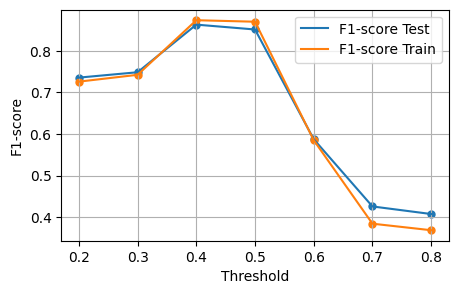

In [4]:
#eval identification performance with different threshold 
thresholds = np.arange(0.20, 0.81, 0.1)
f1_scores_train = []
f1_scores_test = []


for threshold in thresholds:
    # Generate Predictions on train set
    final_predictions_train = process_predictions(probs_train, logreg.classes_, threshold=threshold)
    train_f1 = f1_score(train_y_all_cp, final_predictions_train, average='weighted')
    f1_scores_train.append(train_f1)
    # Generate Predictions on test set
    final_predictions = process_predictions(probs, logreg.classes_, threshold=threshold)
    # Calculating F1 scores
    test_f1 = f1_score(filtered_test_y, final_predictions, average='weighted')  
    f1_scores_test.append(test_f1)


best_threshold_train = thresholds[np.argmax(f1_scores_train)]
best_threshold_test = thresholds[np.argmax(f1_scores_test)]
print(f"Best threshold test: {best_threshold_test:.3f}, F1 Score: {max(f1_scores_test):.3f}")

# draw line graphs
plt.figure(figsize=(5, 3))
plt.plot(thresholds, f1_scores_test, label='F1-score Test')
plt.plot(thresholds, f1_scores_train, label='F1-score Train')
plt.scatter(thresholds,f1_scores_test,  s=25, marker='o')#color='red',
plt.scatter(thresholds,f1_scores_train,  s=25, marker='o')#
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# generate 128-dim feautre file
print(len(test_ip))
new_test_ip=[]
for item in test_ip:
    new_test_ip.append(item[0])
ip_pred_dict = dict(zip(new_test_ip, final_predictions_all))

set_label =  ['adscore',
 'ahrefs',
 'arbor',
 'archive',
 'binaryedge',

 'criminalip',
 'cybergreen',

 'fofa',
 'internet_census',
 'internettl',
 'intrinsec',
 'ipip',
 'leakix',
 'onyphe',
 'quadmetrics',
 'quake',
 'rapid7',
 'rau',
 'shadowserver',
 'shodan',
 'stretchoid',
 'tum',
 'webRay',
 'x_threatbook',
 'zoomeye',
'driftnet(added in unknown)',
 'unknown',
 'censys(added in unknown)'                     ]

if(dataset_name=='SelfDeploy24'):
    mode = 'incre'
    start_date_str = '2024-04-22'    
else:
    mode = ''
    start_date_str = '2025-03-11'   
    
for item in proto_list:
    with open(work_dir+'/'+'packet_level_proj_'+item+'_'+name+'_'+mode+'_'+start_date_str+'.pkl', 'rb') as file:
        data = pickle.load(file)
    if (item == 'http'):
        dic_http = data
        npy_path1 = 'dataset/npy/ip_array_'+item+'_'+name+'_'+mode+'_'+start_date_str+'.npy'
        loaded_array = np.load(npy_path1,allow_pickle=True)
        mask = ~np.isin(loaded_array, ['192.168.1.0', '192.168.2.0','192.168.3.0','192.168.4.0','192.168.5.0'])
        index_array_http=np.load('dataset/npy/'+'index_'+item+'_'+name+'_'+mode+'_'+start_date_str+'.npy')
        index_array_http = index_array_http[mask]
    if (item == 'tls'):
        dic_tls = data
        npy_path1 = 'dataset/npy/ip_array_'+item+'_'+name+'_'+mode+'_'+start_date_str+'.npy'
        loaded_array = np.load(npy_path1,allow_pickle=True)
        mask = ~np.isin(loaded_array, ['192.168.1.0', '192.168.2.0','192.168.3.0','192.168.4.0','192.168.5.0'])
        index_array_tls=np.load('dataset/npy/'+'index_'+item+'_'+name+'_'+mode+'_'+start_date_str+'.npy')
        index_array_tls = index_array_tls[mask]
    if (item == 'dns'):
        dic_dns = data
        npy_path1 = 'dataset/npy/ip_array_'+item+'_'+name+'_'+mode+'_'+start_date_str+'.npy'
        loaded_array = np.load(npy_path1,allow_pickle=True)
        mask = ~np.isin(loaded_array, ['192.168.1.0', '192.168.2.0','192.168.3.0','192.168.4.0','192.168.5.0'])
        index_array_dns=np.load('dataset/npy/'+'index_'+item+'_'+name+'_'+mode+'_'+start_date_str+'.npy')
        index_array_dns = index_array_dns[mask]
# Creating a DataFrame
df_http = pd.DataFrame(dic_http)
df_http['proto']='http'
df_http['index_original']=index_array_http
df_http['y_true_organization_name'] = [set_label[idx] for idx in df_http['y_true']]

df_tls = pd.DataFrame(dic_tls)
df_tls['proto']='tls'
df_tls['index_original']=index_array_tls
df_tls['y_true_organization_name'] = [set_label[idx] for idx in df_tls['y_true']]

df_dns = pd.DataFrame(dic_dns)
df_dns['proto']='dns'
df_dns['index_original']=index_array_dns
df_dns['y_true_organization_name'] = [set_label[idx] for idx in df_dns['y_true']]

df_http['ip_pred']=''
df_tls['ip_pred']=''
df_dns['ip_pred']=''

for index, row in df_http.iterrows():
    df_http.loc[index, 'ip_pred'] = ip_pred_dict[row['ip']]

for index, row in df_tls.iterrows():
    df_tls.loc[index, 'ip_pred'] = ip_pred_dict[row['ip']]

for index, row in df_dns.iterrows():
    df_dns.loc[index, 'ip_pred'] = ip_pred_dict[row['ip']]

result = pd.concat([df_http, df_tls], axis=0, ignore_index=True)
result = pd.concat([result, df_dns], axis=0, ignore_index=True)
print(result)
result.to_csv('proj_'+dataset_name.lower()+'_incre_withindex.csv', index=False)


3206
                                                    proj  packet_pred  y_true  \
0      [-0.24160252511501312, -0.4584161043167114, -0...           25       4   
1      [-0.24160252511501312, -0.4584161043167114, -0...           25       4   
2      [-0.6869127154350281, -0.08172248303890228, -0...            4       4   
3      [-0.24160252511501312, -0.4584161043167114, -0...           25       4   
4      [-0.24160252511501312, -0.4584161043167114, -0...           25       4   
...                                                  ...          ...     ...   
16486  [0.1810433566570282, -0.5190780162811279, -0.9...           25      26   
16487  [0.1810433566570282, -0.5190780162811279, -0.9...           25      26   
16488  [0.29232504963874817, -0.3982889950275421, -0....           25      26   
16489  [0.1810433566570282, -0.5190780162811279, -0.9...           25      26   
16490  [0.1810433566570282, -0.5190780162811279, -0.9...           25      26   

                   ip 

In [6]:
#Evaluate the performance of incremental training on last four weeks of SelfDeploy Dataset
#ensemble learning
import pickle
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
import numpy as np
from sklearn.linear_model import SGDClassifier

from datetime import datetime, timedelta

def generate_date_range(start_date_str, end_date_str):
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
    date_list = []
    current_date = start_date
    
    while current_date <= end_date:
        next_date = min(current_date + timedelta(days=7), end_date + timedelta(days=1))
        date_list.append((current_date.strftime('%Y-%m-%d'),next_date.strftime('%Y-%m-%d')))
        current_date = next_date
    return date_list
    
if (dataset_name=='SelfDeploy24'):
    start_date = '2024-02-01'    
    end_date = '2024-04-21'      
    mode = 'incre'
    date_ranges_total = generate_date_range(start_date, end_date)+[('2024-04-22','2024-04-30')]
else:
    start_date = '2024-12-10'    
    end_date = '2025-03-17'      
    mode = ''
    date_ranges_total = generate_date_range(start_date, end_date)



print('date_ranges_total',date_ranges_total)
test_date_list=[]
f1_score_list=[]

for k in range(0,len(date_ranges_total)-1):
    #current_dates=date_ranges[k]
    start_date = start_date    
    end_date = date_ranges_total[k+1][0]      
    
    date_ranges_new = date_ranges_total[:k+2]
    print('date_ranges',date_ranges_new)
    train_date_ranges=date_ranges_new[:-1]
    test_date=date_ranges_new[-1][0]
    
   
    
    print('train_date_ranges',train_date_ranges)
    print('test_date',test_date)

    test_date_list.append(test_date)
    
    use_train_threshold=1
    
    #for train_interval in time_window_list:    
    train_interval=time_window_list[0]
    
    datasets=[]
    labels=[]
    
    #print('interval',train_interval)
    
        
    
    from datetime import datetime, timedelta
    
    def generate_date_range(start_date_str, end_date_str):
        start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
        end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
        date_list = []
        current_date = start_date
        
        while current_date <= end_date:
            next_date = min(current_date + timedelta(days=7), end_date + timedelta(days=1))
            date_list.append((current_date.strftime('%Y-%m-%d'),next_date.strftime('%Y-%m-%d')))
            current_date = next_date
        return date_list
        

    
    date_ranges = train_date_ranges
    
    #print(date_ranges)
    for current_date_index in range(len(date_ranges)):
        start_date_str,end_date_str=date_ranges[current_date_index]
        for item in proto_list:
            with open(work_dir+'/'+'proto_level_'+str(train_interval)+'daysegment_pred_'+item+'_'+name+'_'+mode+'_'+start_date_str+'.pkl', 'rb') as file:
                data = pickle.load(file)
                #print('data',data)
            if (item == 'http'):
                df_ip_http_group = data
            if (item == 'tls'):
                df_ip_tls_group = data
            if (item == 'dns'):
                df_ip_dns_group = data
            if(item=='rdp'):
                df_ip_rdp_group=data
            if(item=='ssh'):
                df_ip_ssh_group=data
            if(item=='smb'):
                df_ip_smb_group=data
    
        
        import os
        
        
        folder_path = work_dir+'/'+ensemble_dir+'/result_'+str(train_interval)+'day_segment_http'+'_'+start_date_str
            
        files = [f for f in os.listdir(folder_path) if f.startswith('seg') and f.endswith('.csv')]
        train_X_list = []
        train_y_list = []
        for file in files:
            if ('http' in proto_list):
                df_ip_http_train = df_ip_http_group[file]
            if ('tls' in proto_list):
                df_ip_tls_train = df_ip_tls_group[file]
            if ('dns' in proto_list):
                df_ip_dns_train = df_ip_dns_group[file]
            if ('ssh' in proto_list):
                df_ip_ssh_train=df_ip_ssh_group[file]
            if ('rdp' in proto_list):
                df_ip_rdp_train=df_ip_rdp_group[file]
            if ('smb' in proto_list):
                df_ip_smb_train=df_ip_smb_group[file]
        
            merged_df = pd.DataFrame()
            
            # Iterate through the list of variables and merge the corresponding DataFrame
            for var in proto_list:
                df_to_merge = globals()[f'df_ip_{var}_train']
                if merged_df.empty:
                    merged_df = df_to_merge
                else:
                    merged_df = pd.merge(merged_df, df_to_merge, how='outer')
                
            df_train_ip_merge=merged_df
        
            train_X=df_train_ip_merge[['pred_label_' + var for var in proto_list]]
    
            train_y = np.array(df_train_ip_merge[['label']])
            train_X_list.append(train_X)
            train_y_list.append(train_y)
            # train_X=train_X.fillna(None)
        # print(train_X_list,train_y_list)
        train_X_all = train_X_list[0]
        train_y_all = train_y_list[0]
        train_X_all_cp=train_X_all.copy()
        train_y_all_cp=train_y_all.copy()
        
        #print(train_X_all)
        #print(train_y_all)
        
        mask = train_y_all < 25
        train_y_all = train_y_all[mask]
        train_X_all = train_X_all[mask]
        
        #print(train_X)
        
        from sklearn.preprocessing import OneHotEncoder, LabelEncoder
        from sklearn.linear_model import LogisticRegression
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        label_list = ['adscore',
                      'ahrefs',
                      'arbor',
                      'archive',
                      'binaryedge',
        
                      'criminalip',
                      'cybergreen',
        
                      'fofa',
                      'internet_census',
                      'internettl',
                      'intrinsec',
                      'ipip',
                      'leakix',
                      'onyphe',
                      'quadmetrics',
                      'quake',
                      'rapid7',
                      'rau',
                      'shadowserver',
                      'shodan',
                      'stretchoid',
                      'tum',
                      'webRay',
                      'x_threatbook',
                      'zoomeye',
                      'driftnet(added in unknown)',
                      'unknown',
                      'censys(added in unknown)'
                      ]
        
        num_classes = 25
        open_mask = train_y_all >= num_classes
        train_y_all[open_mask] = num_classes
        
        
        value_to_delete = 26
        
        ans_train_y_all_cp = [item for list in train_y_all_cp.tolist() for item in list]
        mask_cp = np.array(ans_train_y_all_cp) != value_to_delete
        train_X_all_cp = train_X_all_cp[mask_cp]
        train_y_all_cp = train_y_all_cp[mask_cp]
        
        num_classes = 25
        open_mask = train_y_all_cp >= num_classes
        train_y_all_cp[open_mask] = num_classes
        
        datasets.append(train_X_all)
        labels.append(train_y_all)

    from sklearn.metrics import log_loss, hinge_loss
    
    onehot_en = OneHotEncoder(sparse_output=False,categories='auto', handle_unknown='infrequent_if_exist')  
    onehot_en = onehot_en.fit(pd.concat(datasets, ignore_index=True))
    all_labels = np.unique([np.concatenate(labels, axis=0)])
    
    
    
    from sklearn.utils.class_weight import compute_sample_weight
    logreg = LogisticRegression(multi_class='ovr',class_weight ='balanced') 
    logreg.classes_ = all_labels
    train_X_onehot = onehot_en.transform(pd.concat(datasets, ignore_index=True))
    logreg.fit(train_X_onehot, np.concatenate(labels, axis=0))  

    
    start_date_str=test_date
    if (dataset_name=='SelfDeploy24'):
        mode = 'incre'
    else:
        mode = ''
    for item in proto_list:
        if(start_date_str!='2024-04-22'):
            with open(work_dir+'/'+'proto_level_7daysegment_pred_'+item+'_'+name+'_'+mode+'_'+start_date_str+'.pkl', 'rb') as file:
                data = pickle.load(file)
        else:
            mode = 'test'
            with open(work_dir+'/'+'proto_level_pred_'+item+'_'+name+'_'+mode+'.pkl', 'rb') as file:
                data = pickle.load(file)
        if (item == 'http'):
            df_ip_http_test = data
        if (item == 'tls'):
            df_ip_tls_test = data
        if (item == 'dns'):
            df_ip_dns_test = data
        if(item=='rdp'):
            df_ip_rdp_test=data
        if(item=='ssh'):
            df_ip_ssh_test=data
        if(item=='smb'):
            df_ip_smb_test=data


    npy_path1 = 'dataset/npy/ip_array_'+item+'_'+name+'_'+mode+'_'+start_date_str+'.npy'
    if(start_date_str=='2024-04-22'):
        npy_path1 = 'dataset/npy/ip_array_'+item+'_'+name+'_'+mode+'.npy'
    #npy_path2 = 'label_array_'+proto+'_'+name+'_'+mode+'.npy'
    #dataset = NumpyDataset(npy_path1,npy_path2)
    
    loaded_array = np.load(npy_path1,allow_pickle=True)
    loaded_array
    len(loaded_array)
    
    
    merged_df = pd.DataFrame()
    if(start_date_str!='2024-04-22' and start_date_str!='2025-03-11'):
        # Iterate through the list of variables and merge the corresponding DataFrame
        for var in proto_list:
            df_to_merge = globals()[f'df_ip_{var}_test']
            if merged_df.empty:
                merged_df = df_to_merge['segment_1.csv']
            else:
                merged_df = pd.merge(merged_df, df_to_merge['segment_1.csv'], how='outer')
    else:
        for var in proto_list:
            df_to_merge = globals()[f'df_ip_{var}_test']
            if merged_df.empty:
                merged_df = df_to_merge
            else:
                merged_df = pd.merge(merged_df, df_to_merge, how='outer')
            
    df_test_ip_merge=merged_df
    #print(df_test_ip_merge)
    
    test_X=df_test_ip_merge[['pred_label_' + var for var in proto_list]]
    test_y = np.array(df_test_ip_merge[['label']])
    test_X_onehot = onehot_en.transform(test_X)
    

    y_pred = logreg.predict(test_X_onehot)
    
    # output Predict Probabilities
    probs = logreg.predict_proba(test_X_onehot)
    # #
    ans_test_y = [item for list in test_y.tolist() for item in list]
    ans_y_pred = y_pred  # [item for list in y_pred.tolist() for item in list]
    
    filtering = 1
    
    C = confusion_matrix(test_y, y_pred)
    
    value_to_delete = 26
    mask = np.array(ans_test_y) != value_to_delete
    
    num_classes = 25
    open_mask = test_y >= num_classes
    test_y[open_mask] = num_classes
    # filtered_test_y[open_mask] = num_classes
    
    filtered_test_y = test_y[mask]
    filtered_y_pred = y_pred[mask]
    probs = probs[mask]
    # filtered_y_true_openset=filtered_y_true[open_mask]
    

    def process_predictions(probs, classes, threshold=0.5, unknown_label=25):
        predictions = []
        for prob in probs:
            max_prob = np.max(prob)
            if max_prob < threshold:
                predictions.append(unknown_label)
            else:
                predictions.append(classes[np.argmax(prob)])
        return predictions
    
    def find_best_threshold(probs, true_labels, classes, thresholds=np.arange(0.0, 1.1,0.01)):
        best_threshold = 0
        best_f1 = 0
    
        for threshold in thresholds:
            final_predictions = process_predictions(probs, classes, threshold=threshold)
            #final_predictions = np.array(final_predictions)[mask]
            test_f1 = f1_score(true_labels, final_predictions, average='weighted')  
    
            if test_f1 > best_f1:
                best_f1 = test_f1
                best_threshold = threshold
        return best_threshold, best_f1
    
    train_X_all_cp_onehot = onehot_en.transform(train_X_all_cp)
    probs_train = logreg.predict_proba(train_X_all_cp_onehot)
    
    if(use_train_threshold):
        best_threshold, best_f1 = find_best_threshold( probs_train, train_y_all_cp, logreg.classes_)
    else:
        best_threshold, best_f1 = find_best_threshold( probs, filtered_test_y, logreg.classes_)
    
    #print(best_threshold)
    final_predictions = process_predictions(probs, logreg.classes_, threshold=best_threshold)#
    final_predictions_defalut = process_predictions(probs, logreg.classes_, threshold=0.5)#
    

    
    
    #final_predictions = np.array(final_predictions)[mask]
    
    
    
    index_list = list(set(ans_test_y) | set(ans_y_pred))
    label_list_new = []
    for item in index_list:
        label_list_new.append(label_list[item])
    
    filtered_test_y_new = [item for list in filtered_test_y.tolist() for item in list]
    index_list = list(set(filtered_test_y_new) | set(filtered_y_pred))
    label_list_new_new = []
    for item in index_list:
        label_list_new_new.append(label_list[item])
    
    # filtered_test_y_new = [item for list in filtered_test_y.tolist() for item in list]
    index_list = list(set(filtered_test_y_new) | set(final_predictions))
    label_list_new_new_known_class = []
    for item in index_list:
        label_list_new_new_known_class.append(label_list[item])
    
    print('test', classification_report(filtered_test_y, final_predictions,
                                        target_names=label_list_new_new_known_class[:-1] + ['censys+driftnet']))

    from sklearn.metrics import classification_report

    def save_classification_report(y_true,y_pred,target_names,save_path):
        acc_report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=target_names,output_dict=True,zero_division=np.nan)).T
        acc_report_df.iloc[-3,:2]= np.nan
        acc_report_df.iloc[-3,3]= acc_report_df.iloc[-2,3]
        # acc_report_df.iloc[-3,2]= np.nan
        acc_report_df.to_csv(save_path,float_format='%.3f')
        return acc_report_df.round(2)
    save_path='report/'+name+'incre_'+str(train_interval)+'.csv'
    acc_report_df = save_classification_report(filtered_test_y, final_predictions,target_names=label_list_new_new_known_class[:-1]+['censys+driftnet'],save_path=save_path)

    
    test_f1 = f1_score(filtered_test_y, final_predictions, average='weighted')

    f1_score_list.append(test_f1)
    #results[k, j] = test_f1
    test_f1_defalut = f1_score(filtered_test_y, final_predictions_defalut, average='weighted')  
    #print('eta',eta,'epoch',total_epochs,'interval',train_interval,'test_f1',"{:.3f}".format(test_f1))
    print('test_f1_defalut',test_f1_defalut)


    print(test_date_list)
    print(f1_score_list)

date_ranges_total [('2024-12-10', '2024-12-17'), ('2024-12-17', '2024-12-24'), ('2024-12-24', '2024-12-31'), ('2024-12-31', '2025-01-07'), ('2025-01-07', '2025-01-14'), ('2025-01-14', '2025-01-21'), ('2025-01-21', '2025-01-28'), ('2025-01-28', '2025-02-04'), ('2025-02-04', '2025-02-11'), ('2025-02-11', '2025-02-18'), ('2025-02-18', '2025-02-25'), ('2025-02-25', '2025-03-04'), ('2025-03-04', '2025-03-11'), ('2025-03-11', '2025-03-18')]
date_ranges [('2024-12-10', '2024-12-17'), ('2024-12-17', '2024-12-24')]
train_date_ranges [('2024-12-10', '2024-12-17')]
test_date 2024-12-17


/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/

test                  precision    recall  f1-score   support

     binaryedge       0.00      0.00      0.00       103
     criminalip       0.00      0.00      0.00        10
     cybergreen       0.00      0.00      0.00         1
           fofa       0.00      0.00      0.00         3
internet_census       0.00      0.00      0.00        63
     internettl       0.00      0.00      0.00         2
      intrinsec       0.00      0.00      0.00         1
           ipip       0.00      0.00      0.00         5
         onyphe       1.00      0.59      0.74        29
   shadowserver       1.00      0.27      0.42       101
         shodan       0.00      0.00      0.00         9
     stretchoid       0.00      0.00      0.00       279
            tum       0.00      0.00      0.00         1
   x_threatbook       0.00      0.00      0.00         1
        zoomeye       0.00      0.00      0.00         1
censys+driftnet       0.25      1.00      0.40       189

       accuracy         

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/a

test                  precision    recall  f1-score   support

     binaryedge       0.00      0.00      0.00        64
     criminalip       0.00      0.00      0.00        10
     cybergreen       0.00      0.00      0.00         1
           fofa       0.00      0.00      0.00         3
internet_census       0.00      0.00      0.00        28
     internettl       0.00      0.00      0.00         3
      intrinsec       0.00      0.00      0.00         2
           ipip       0.00      0.00      0.00         4
         onyphe       0.00      0.00      0.00        21
   shadowserver       1.00      0.27      0.43       102
         shodan       0.00      0.00      0.00        16
     stretchoid       0.00      0.00      0.00       260
            tum       0.00      0.00      0.00         1
censys+driftnet       0.36      1.00      0.52       265

       accuracy                           0.38       780
      macro avg       0.10      0.09      0.07       780
   weighted avg       0.

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/a

test                  precision    recall  f1-score   support

     binaryedge       0.00      0.00      0.00        95
     criminalip       0.00      0.00      0.00         7
     cybergreen       0.00      0.00      0.00         1
           fofa       0.00      0.00      0.00         5
internet_census       0.00      0.00      0.00        46
     internettl       1.00      0.80      0.89         5
      intrinsec       0.00      0.00      0.00         2
           ipip       0.00      0.00      0.00         6
         onyphe       0.00      0.00      0.00        31
          quake       0.00      0.00      0.00         1
   shadowserver       1.00      0.28      0.44        96
         shodan       0.67      0.18      0.29        11
     stretchoid       0.00      0.00      0.00       277
            tum       0.00      0.00      0.00         1
censys+driftnet       0.33      1.00      0.49       269

       accuracy                           0.35       853
      macro avg       0.

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/a

test                  precision    recall  f1-score   support

     binaryedge       0.00      0.00      0.00        81
     criminalip       0.00      0.00      0.00         9
     cybergreen       0.00      0.00      0.00         1
           fofa       0.00      0.00      0.00         3
internet_census       0.00      0.00      0.00        60
     internettl       0.60      0.75      0.67         4
      intrinsec       0.00      0.00      0.00         2
           ipip       0.00      0.00      0.00         8
         onyphe       0.00      0.00      0.00        38
   shadowserver       1.00      0.28      0.44       106
         shodan       0.50      0.08      0.14        12
     stretchoid       0.00      0.00      0.00       293
            tum       0.00      0.00      0.00         1
        zoomeye       0.00      0.00      0.00         1
censys+driftnet       0.31      1.00      0.47       258

       accuracy                           0.33       877
      macro avg       0.

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/a

test                  precision    recall  f1-score   support

     binaryedge       0.00      0.00      0.00        42
     criminalip       0.00      0.00      0.00        11
     cybergreen       0.00      0.00      0.00         1
           fofa       0.00      0.00      0.00         3
internet_census       0.00      0.00      0.00        38
     internettl       1.00      0.20      0.33         5
      intrinsec       0.00      0.00      0.00         2
           ipip       0.00      0.00      0.00         8
         onyphe       0.00      0.00      0.00        28
   shadowserver       1.00      0.30      0.47        99
         shodan       0.50      0.14      0.22         7
     stretchoid       0.96      0.35      0.51       265
            tum       0.00      0.00      0.00         1
censys+driftnet       0.39      1.00      0.56       241

       accuracy                           0.49       751
      macro avg       0.27      0.14      0.15       751
   weighted avg       0.

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/a

test                  precision    recall  f1-score   support

     binaryedge       0.00      0.00      0.00        40
     criminalip       0.00      0.00      0.00        10
     cybergreen       1.00      1.00      1.00         1
           fofa       0.00      0.00      0.00         3
internet_census       0.00      0.00      0.00        80
     internettl       0.83      1.00      0.91         5
      intrinsec       0.00      0.00      0.00         2
           ipip       0.00      0.00      0.00         6
         onyphe       0.00      0.00      0.00        29
   shadowserver       1.00      0.23      0.38        94
         shodan       0.00      0.00      0.00        10
     stretchoid       0.70      0.34      0.46       262
            tum       0.00      0.00      0.00         1
        zoomeye       0.00      0.00      0.00         1
censys+driftnet       0.39      1.00      0.56       231

       accuracy                           0.45       775
      macro avg       0.

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/a

test                  precision    recall  f1-score   support

     binaryedge       0.00      0.00      0.00       108
     criminalip       0.00      0.00      0.00        11
     cybergreen       0.33      1.00      0.50         1
           fofa       0.00      0.00      0.00         3
internet_census       1.00      0.54      0.70        46
     internettl       0.71      1.00      0.83         5
      intrinsec       0.00      0.00      0.00         2
           ipip       0.00      0.00      0.00         7
         onyphe       0.00      0.00      0.00        26
   shadowserver       1.00      0.25      0.40        92
         shodan       0.57      0.44      0.50         9
     stretchoid       0.74      0.54      0.62       261
            tum       0.00      0.00      0.00         1
censys+driftnet       0.46      0.98      0.63       257

       accuracy                           0.54       829
      macro avg       0.34      0.34      0.30       829
   weighted avg       0.

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


test                  precision    recall  f1-score   support

     binaryedge       1.00      0.77      0.87        52
     criminalip       0.00      0.00      0.00        10
     cybergreen       1.00      1.00      1.00         1
           fofa       0.00      0.00      0.00         2
internet_census       1.00      0.89      0.94        63
     internettl       0.80      1.00      0.89         4
      intrinsec       0.00      0.00      0.00         2
           ipip       0.00      0.00      0.00         7
         onyphe       0.00      0.00      0.00        31
   shadowserver       1.00      0.29      0.45        93
         shodan       1.00      1.00      1.00         8
     stretchoid       0.94      0.53      0.68       265
            tum       0.00      0.00      0.00         1
censys+driftnet       0.49      0.95      0.65       235

       accuracy                           0.64       774
      macro avg       0.52      0.46      0.46       774
   weighted avg       0.

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/

test                  precision    recall  f1-score   support

     binaryedge       0.89      1.00      0.94        32
     criminalip       1.00      0.40      0.57        10
     cybergreen       1.00      1.00      1.00         1
           fofa       0.00      0.00      0.00         2
internet_census       1.00      0.94      0.97        63
     internettl       0.62      0.83      0.71         6
      intrinsec       1.00      0.50      0.67         2
           ipip       0.00      0.00      0.00         6
         onyphe       0.00      0.00      0.00        30
          quake       0.00      0.00      0.00         2
   shadowserver       1.00      0.50      0.67        98
         shodan       1.00      1.00      1.00        11
     stretchoid       0.89      0.78      0.83       249
            tum       0.00      0.00      0.00         1
censys+driftnet       0.64      0.97      0.77       234

       accuracy                           0.78       747
      macro avg       0.

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/

test                  precision    recall  f1-score   support

     binaryedge       0.88      0.54      0.67        13
     criminalip       1.00      0.90      0.95        10
     cybergreen       1.00      1.00      1.00         1
           fofa       0.00      0.00      0.00         2
internet_census       1.00      0.91      0.95        44
     internettl       1.00      1.00      1.00         6
      intrinsec       1.00      0.50      0.67         2
           ipip       0.00      0.00      0.00         6
         onyphe       0.85      0.35      0.50        31
          quake       0.00      0.00      0.00         2
   shadowserver       1.00      0.53      0.69        95
         shodan       1.00      0.83      0.91         6
     stretchoid       0.88      0.82      0.85       234
            tum       0.00      0.00      0.00         1
   x_threatbook       0.00      0.00      0.00         1
censys+driftnet       0.66      1.00      0.80       203

       accuracy         

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/

test                  precision    recall  f1-score   support

     binaryedge       0.95      0.62      0.75        29
     criminalip       1.00      0.90      0.95        10
     cybergreen       1.00      1.00      1.00         1
           fofa       0.00      0.00      0.00         3
internet_census       1.00      0.94      0.97        65
     internettl       0.67      1.00      0.80         6
      intrinsec       1.00      1.00      1.00         2
           ipip       0.00      0.00      0.00         6
         onyphe       1.00      0.86      0.92        21
   shadowserver       1.00      0.49      0.66        99
         shodan       1.00      1.00      1.00        10
     stretchoid       0.75      0.89      0.82       275
            tum       0.00      0.00      0.00         1
        zoomeye       0.00      0.00      0.00         1
censys+driftnet       0.69      0.77      0.73       240

       accuracy                           0.78       769
      macro avg       0.

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/

test                  precision    recall  f1-score   support

     binaryedge       1.00      1.00      1.00        35
     criminalip       0.88      0.88      0.88         8
     cybergreen       0.50      1.00      0.67         1
           fofa       0.00      0.00      0.00         3
internet_census       1.00      0.95      0.97        39
     internettl       0.50      1.00      0.67         6
      intrinsec       1.00      1.00      1.00         2
           ipip       0.00      0.00      0.00         5
         onyphe       1.00      0.81      0.90        32
          quake       0.00      0.00      0.00         1
   shadowserver       1.00      0.53      0.69       104
         shodan       1.00      1.00      1.00         9
     stretchoid       0.90      0.97      0.93       350
            tum       0.00      0.00      0.00         1
censys+driftnet       0.82      0.93      0.87       239

       accuracy                           0.88       835
      macro avg       0.

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


test                  precision    recall  f1-score   support

     binaryedge       1.00      0.65      0.79        92
     criminalip       1.00      0.82      0.90        11
     cybergreen       1.00      1.00      1.00         1
           fofa       0.00      0.00      0.00         3
internet_census       1.00      0.96      0.98        72
     internettl       0.54      1.00      0.70         7
      intrinsec       1.00      1.00      1.00         2
           ipip       0.00      0.00      0.00         6
         onyphe       0.68      0.81      0.74        26
          quake       0.00      0.00      0.00         2
         rapid7       0.00      0.00      0.00         5
   shadowserver       0.92      0.51      0.66       118
         shodan       1.00      1.00      1.00        10
     stretchoid       0.91      0.98      0.95       400
            tum       0.00      0.00      0.00         1
censys+driftnet       0.77      0.96      0.85       265

       accuracy         

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


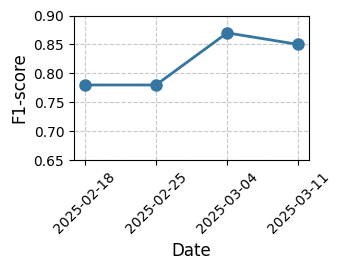

In [7]:
#Draw performance on last four weeks of SelfDeploy Dataset
test_date_list=test_date_list[-4:]
f1_score_list=f1_score_list[-4:]
f1_score_list = [round(item, 2) for item in f1_score_list]

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

def format_ticks(value, pos):
    return '{:.2f}'.format(value)


date_objects = pd.to_datetime(test_date_list)

plt.figure(figsize=(3.5, 2.8))
plt.plot(f1_score_list, marker='o', linestyle='-', linewidth=2, markersize=8,color='#3575A2')
plt.xlabel('Date', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.xticks([0,1,2,3],labels=test_date_list,size=10)
plt.xticks(rotation=45)
plt.ylim(0.65,0.9)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()